# Importing Datasets

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#class used for generating batches of augmented data which are used to help prevent overfitting
#data augmentations allow the data to be invariant to the agmentations performed
#found this article very helpful when deciding the augmentations to perform:
#https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/
train_data_gen = ImageDataGenerator(rescale=1.0/255.0, zoom_range=[0.95, 1.05],
                                             width_shift_range=0.1, height_shift_range=0.1, 
                                             brightness_range=(0.7, 1.5), rotation_range=10,horizontal_flip = True)
valid_data_gen = ImageDataGenerator(rescale=1.0/255.0)
#defining batch_size 
batch_size = 32
        
        
        
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
train = train_data_gen.flow_from_directory(
        'Downloads/classification-challenge/classification-challenge/classification-challenge-starter/Covid19-dataset/train', shuffle = False
        

)
test = valid_data_gen.flow_from_directory(
        'Downloads/classification-challenge/classification-challenge/classification-challenge-starter/Covid19-dataset/test', shuffle = False

        )



Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


# Visualizing Datasets

(32, 256, 256, 3)


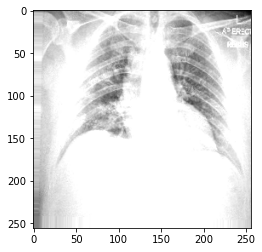

(32, 256, 256, 3)


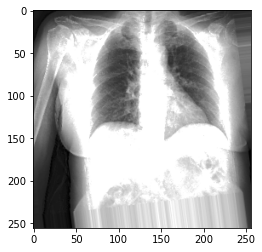

(32, 256, 256, 3)


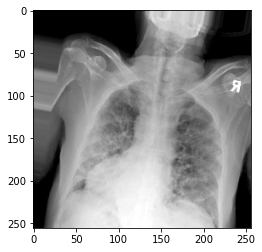

(32, 256, 256, 3)


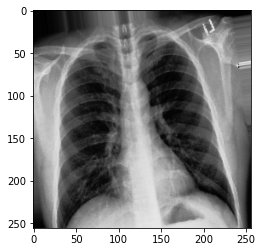

(32, 256, 256, 3)


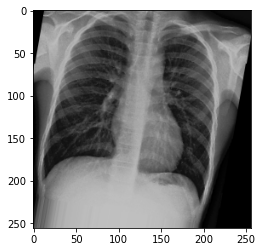

(32, 256, 256, 3)


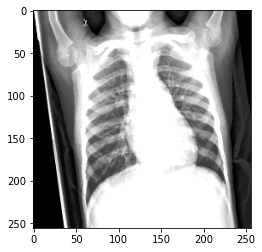

(32, 256, 256, 3)


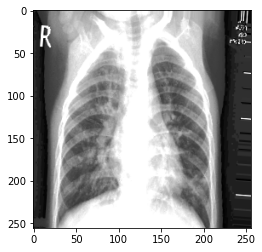

(32, 256, 256, 3)


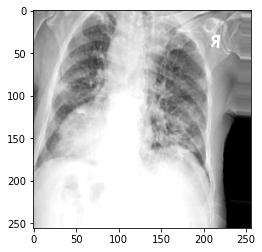

(32, 256, 256, 3)


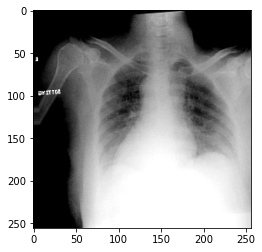

(32, 256, 256, 3)


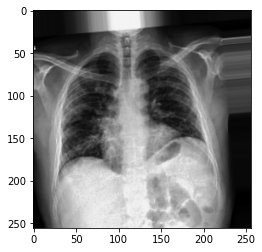

(32, 256, 256, 3)


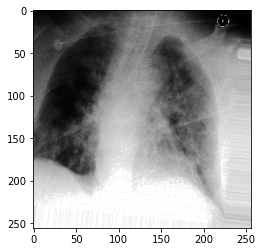

(32, 256, 256, 3)


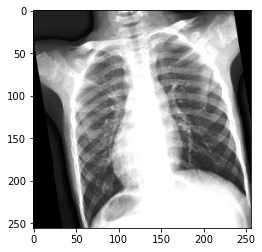

(32, 256, 256, 3)


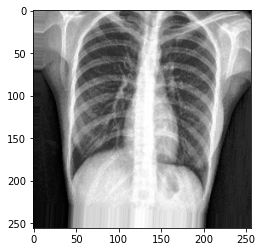

(32, 256, 256, 3)


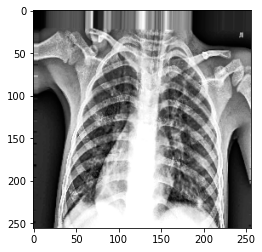

(32, 256, 256, 3)


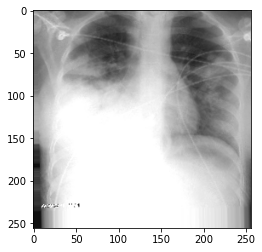

(32, 256, 256, 3)


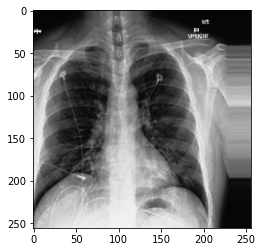

(32, 256, 256, 3)


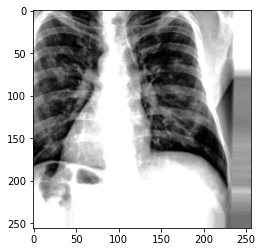

(32, 256, 256, 3)


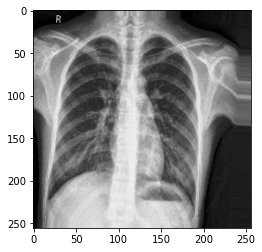

(32, 256, 256, 3)


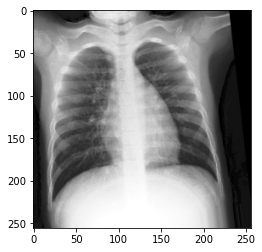

(32, 256, 256, 3)


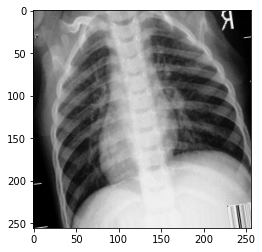

(32, 256, 256, 3)


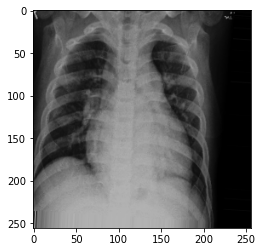

(32, 256, 256, 3)


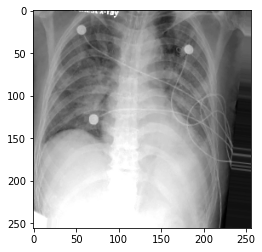

(32, 256, 256, 3)


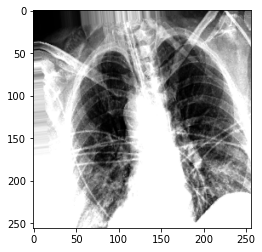

(32, 256, 256, 3)


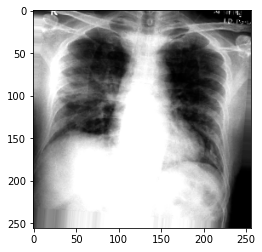

(32, 256, 256, 3)


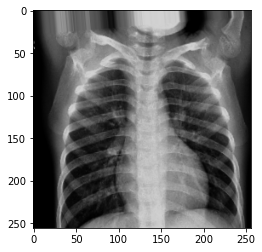

(32, 256, 256, 3)


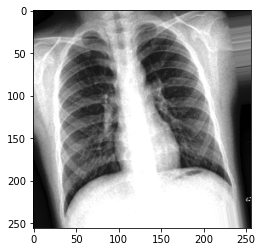

(32, 256, 256, 3)


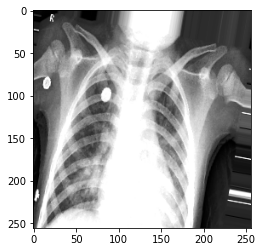

(32, 256, 256, 3)


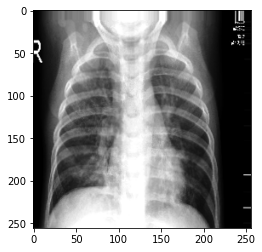

In [6]:
from matplotlib import pyplot as plt

for i in range(batch_size):
    img, labels = train.next()
    if img.shape[0] == 32:
        print(img.shape)
        plt.imshow(np.squeeze(img[i]))#remove dimension to print images 
        plt.show()

# Building the CNN

In [7]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

#instantiate model and add all layers
model = tf.keras.Sequential()
#Input Layer
model.add(tf.keras.Input(shape=(256, 256, 3)))
#first convolution layer


model.add(Conv2D(16, 3, strides=1, activation="relu", padding='same')) 

model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(32, 3, strides=1, activation="relu"))

model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(16, 5, strides=2, activation="relu")) 

model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))

model.add(layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation='relu'))
# output layer with softmax activation function
model.add(layers.Dense(3,activation="softmax"))

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 85, 85, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 83, 83, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 27, 27, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 16)        12816     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 16)        

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC()],)


In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss', save_best_only=True)

In [10]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', mode='min', verbose=0, patience=100, factor=0.2)

In [ ]:
history = model.fit(
        train,
        steps_per_epoch=train.samples/batch_size, epochs=100,
        validation_data=test,
        validation_steps=test.samples/batch_size,
        callbacks = [reduce_lr,checkpoint]
        )

Epoch 1/100
7/7 [==============================] - 12s 621ms/step - loss: 1.3202 - categorical_accuracy: 0.3625 - auc: 0.4353 - val_loss: 1.1420 - val_categorical_accuracy: 0.3939 - val_auc: 0.4635 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - 4s 532ms/step - loss: 1.1125 - categorical_accuracy: 0.4422 - auc: 0.5431 - val_loss: 1.0998 - val_categorical_accuracy: 0.3939 - val_auc: 0.4833 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - 4s 522ms/step - loss: 1.0955 - categorical_accuracy: 0.4422 - auc: 0.5090 - val_loss: 1.0979 - val_categorical_accuracy: 0.3939 - val_auc: 0.5147 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - 4s 530ms/step - loss: 1.0889 - categorical_accuracy: 0.4422 - auc: 0.5693 - val_loss: 1.0962 - val_categorical_accuracy: 0.3939 - val_auc: 0.5201 - lr: 0.0010
Epoch 5/100
7/7 [==============================] - 4s 532ms/step - loss: 1.0968 - categorical_accuracy: 0.4502 - auc: 0.5161 - val_loss: 1.0927 - val_categoric

# Visualizing and analyzing the model's performance

Text(0, 0.5, 'Categorical Accuracy')

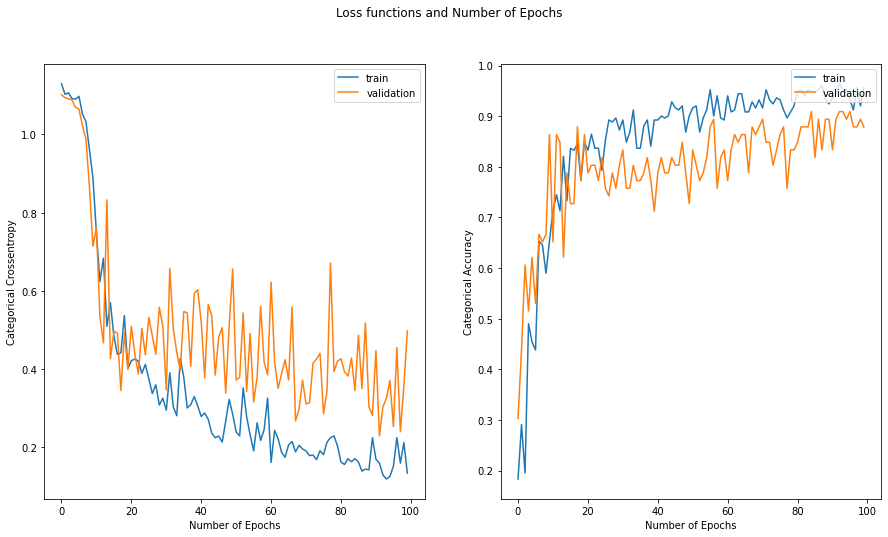

In [137]:
fig, axs = plt.subplots(1,2, figsize=(15, 8))
plt.suptitle('Loss functions and Number of Epochs')
(ax1, ax2) = axs

#first plot Categorical Crossentropy vs epochs
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='validation')
ax1.legend(loc="upper right")
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Categorical Crossentropy')

#second plot categorical accuracy vs epochs
ax2.plot(history.history['categorical_accuracy'], label='train')
ax2.plot(history.history['val_categorical_accuracy'], label='validation')
ax2.legend(loc="upper right")
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Categorical Accuracy')

3/3 [==============================] - 0s 39ms/step - loss: 0.4978 - categorical_accuracy: 0.8788 - auc_8: 0.9494
[0.4978218078613281, 0.8787878751754761, 0.949380099773407]


The predicted values are:
[0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]

The actual values are:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        26
           1       1.00      0.75      0.86        20
           2       0.71      1.00      0.83        20

    accuracy                           0.88        66
   macro avg       0.90      0.88      0.88        66
weighted avg       0.91      0.88      0.88        66



[Text(0, 0.5, 'Covid'), Text(0, 1.5, 'Normal'), Text(0, 2.5, 'Pneumonia')]

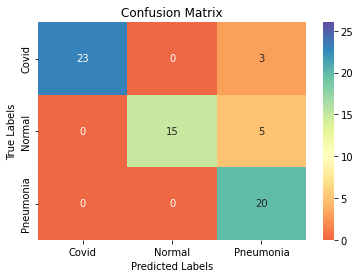

In [138]:
from sklearn.metrics import classification_report,  confusion_matrix, f1_score
import seaborn as sns


#evaluating the model
loss = model.evaluate(test)
print(loss)
print('')

print('')
#getting predictions for futher evaluation
preds = model.predict(test)
preds = np.argmax(preds, axis=1)
#looking at the values that were predicted and the true values
print('The predicted values are:')
print(preds)
print('')
print('The actual values are:')
print(test.classes)
print('')
print('Classification Report:')
print(classification_report(test.classes, preds, labels=[0,1,2]))
#f1 score: The weighted avg of precision and recall where each have the same weight best at 1 and worse at 0. Each 
#class has its own F1 score. F1 = 2 * (precision * recall) / (precision + recall). This is good when the classes are 
#are skewed. Recall is sensitivty or TPR (True Positive Rate = TP/(TP+FN)). Precision = TP/(TP+FP)

#creating confusion matrix plot with sns
cm=confusion_matrix(test.classes, preds)
ax = plt.subplot()
sns.heatmap(cm, vmin=0, vmax=26, center=10, cmap="Spectral", annot=True)
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels') 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Covid', 'Normal', "Pneumonia"]) 
ax.yaxis.set_ticklabels(['Covid', 'Normal', "Pneumonia"])

In [139]:
model.load_weights('weights.hdf5')